# <center>Network Science</center>

## <center>Home Assignment #3: Power law</center>

### <center>Student: *Alexander Shirnin*</center>

#### <hr /> General Information

**Due Date:** 30.04.2021 23:59

**Late submission policy:** -2 points per day


Support your computations with figures and comments.
If you are using IPython Notebook you may use this file as a starting point of your report.

## Problems

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 
1. Check that Zipf's Law holds
2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
3. Produce summary of the frequencies: min, max, mean, median

0. Firstly, get data:

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import powerlaw 

import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("wordcounts.txt", delimiter=" ", header=None)
df.columns = ["frequency", "word"]

In [42]:
df.head(5)

,frequency,word
0,6187267,the
1,4239632,be
2,3093444,of
3,2687863,and
4,2186369,a


1. Check the law:

Total words:

In [46]:
len(df)

6318

In [51]:
check_list = []
first_freq = df.frequency.max()

for i in range(1, len(df) + 1):
    freq = first_freq / i
    check_list.append(freq)

Here we plot frequencies accoring to Zipf's law and real ones, as we see, they are almost the same, therefore the law holds.

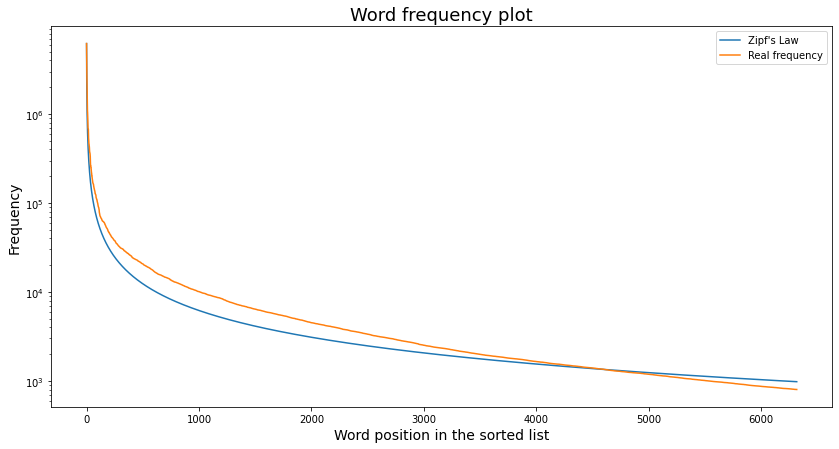

In [70]:
fig = plt.figure(figsize=(14,7))

plt.yscale('log')
plt.title("Word frequency plot", size=18)
plt.xlabel("Word position in the sorted list", size=14)
plt.ylabel("Frequency", size=14)
plt.plot(check_list, label="Zipf's Law")
plt.plot(df.frequency.values, label="Real frequency")
plt.legend()
plt.show()

2. $\alpha$ of the distribution and mean sample variance $\sigma^2$:

If we talk about $\alpha$ as a scaling factor, then it equalls the maximum word frequency = 6187267. It scales our function f(x), that is a * x**(-k), where x is from 1 to n.

Here we get sample variance:

In [74]:
df.frequency.var()

15363210421.721893

3. Here we get summary of frequencies. 50% is a median by definition, so you can see all stats below:

In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
frequency,6318.0,13566.670782,123948.418391,800.0,1282.25,2335.0,6049.5,6187267.0


In [45]:
df.frequency.median()

2335.0

### <hr /> Task 2.

Find and plot PDF and CDF for the following networks:
* [Routing network](http://www.leonidzhukov.net/hse/2015/networks/data/network.txt)
* [Web graph](http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt)

1. Are they correspondent to power law?
2. Find max and mean values of incoming and outcoming node degrees
3. Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$
4. Determine $x_{min}$ via Kolmogorov-Smirnov test
5. Try to fit Erdos model for the Web Graph and describe common and different points in their descriptive statistics

In [2]:
G = nx.read_edgelist("web_Stanford.txt",create_using=nx.DiGraph(), nodetype = int)

In [3]:
G1 = nx.read_edgelist("network.txt",create_using=nx.DiGraph(), nodetype = int)

Get degree sequences:

In [4]:
# will be used for degree distribution and powerlaw test
degree_sequence1 = sorted([d for n, d in G.degree()], reverse=True)

In [5]:
# will be used for degree distribution and powerlaw test
degree_sequence2 = sorted([d for n, d in G1.degree()], reverse=True)

Fit powerlaw formula:

In [8]:
fit1 = powerlaw.Fit(degree_sequence1)

Calculating best minimal value for power law fit


In [9]:
fit2 = powerlaw.Fit(degree_sequence2)

Calculating best minimal value for power law fit


So here we have graphs of pdf and cdf, as we see, these graphs pretty much correspondent to power law.

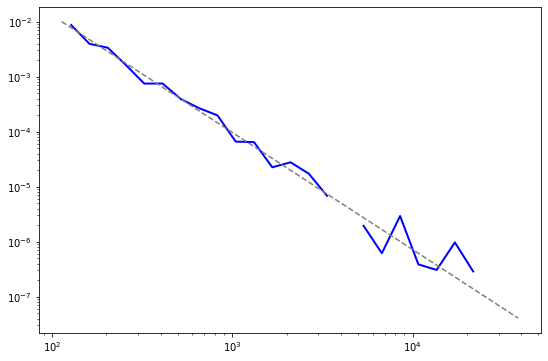

In [170]:
fig = plt.figure(figsize=(9,6))

fig2 = fit1.plot_pdf(color='b', linewidth=2)
fit1.power_law.plot_pdf(color='gray', linestyle='--', ax=fig2)
plt.show()

/home/alexander/PythonProjects/MO/venb/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


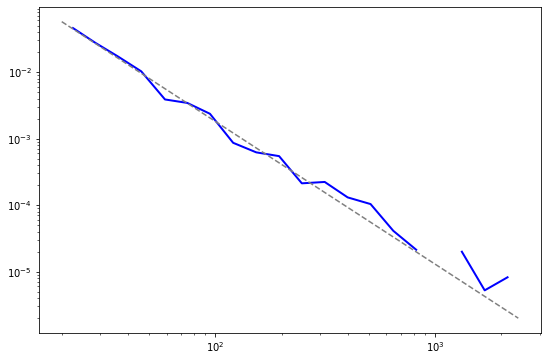

In [135]:
fig = plt.figure(figsize=(9,6))

fig2 = fit2.plot_pdf(color='b', linewidth=2)
fit2.power_law.plot_pdf(color='gray', linestyle='--', ax=fig2)
plt.show()

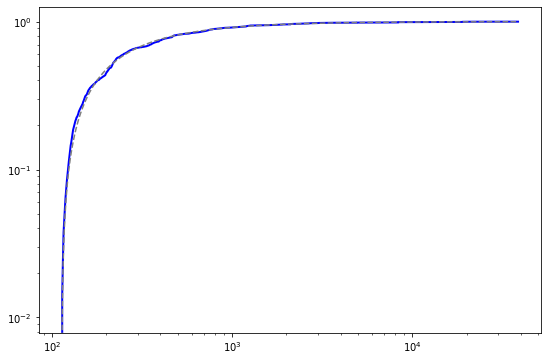

In [171]:
fig = plt.figure(figsize=(9,6))

fig2 = fit1.plot_cdf(color='b', linewidth=2)
fit1.power_law.plot_cdf(color='gray', linestyle='--', ax=fig2)
plt.show()

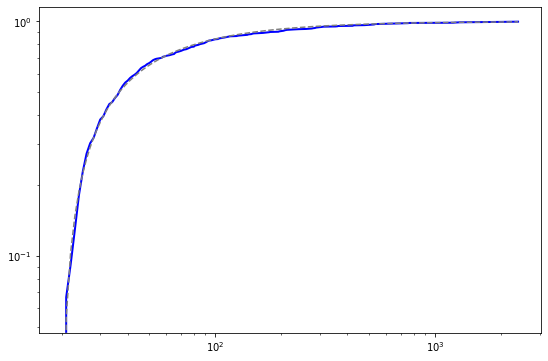

In [172]:
fig = plt.figure(figsize=(9,6))

fig2 = fit2.plot_cdf(color='b', linewidth=2)
fit2.power_law.plot_cdf(color='gray', linestyle='--', ax=fig2)
plt.show()

2. Find max and mean values of incoming and outcoming node degrees

Let's get lists of degrees of our graphs:

In [141]:
in_degree_G = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)

In [142]:
out_degree_G = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)

In [143]:
in_degree_G1 = sorted(G1.in_degree(), key=lambda x: x[1], reverse=True)

In [144]:
out_degree_G1 = sorted(G1.out_degree(), key=lambda x: x[1], reverse=True)

Maximum in degrees:

In [147]:
print(in_degree_G[0][1])
print(in_degree_G1[0][1])

38606
40


Maximum out degrees:

In [148]:
print(out_degree_G[0][1])
print(out_degree_G1[0][1])

255
2389


Mean in degrees:

In [165]:
sum([i[1] for i in in_degree_G])/len(in_degree_G)

8.203165627893283

In [166]:
sum([i[1] for i in in_degree_G1])/len(in_degree_G1)

2.109306275312459

Mean out degrees:

In [167]:
sum([i[1] for i in out_degree_G])/len(out_degree_G)

8.203165627893283

In [169]:
sum([i[1] for i in out_degree_G1])/len(out_degree_G1)

2.109306275312459

3. Find 𝛼 via Maximum Likelihood and calculate 𝜎**2

According to documentation: Fitting is by maximum likelihood estimation by default. Thus, we have:

In [177]:
fit1.alpha

2.1276471472671767

In [176]:
fit2.alpha

2.14665851515244

Variance via np functions:

In [189]:
np.array(degree_sequence1).var()

27972.528821544904

In [190]:
np.array(degree_sequence2).var()

1085.2035258892943

4. Here we used Kolmogorov-Smirnov distance for a fitting method and then we get xmin.

In [182]:
fit3 = powerlaw.Fit(degree_sequence1, fit_method='KS')

Calculating best minimal value for power law fit


In [183]:
fit4 = powerlaw.Fit(degree_sequence2, fit_method='KS')

Calculating best minimal value for power law fit


In [184]:
fit3.xmin

113.0

In [185]:
fit4.xmin

20.0

5. Try to fit Erdos model for the Web Graph and describe common and different points in their descriptive statistics

Fitting Erdos model for the Web Graph:

In [14]:
n = 22963  # 22963 nodes
m = 48436  # 48436 edges

Erdos = nx.gnm_random_graph(n, m)

Stats:

In [23]:
degree_erdos = sorted(Erdos.degree(), key=lambda x: x[1], reverse=True)

degree_usual = sorted(G1.degree(), key=lambda x: x[1], reverse=True)

Mean degree for Erdos model:

In [22]:
sum([i[1] for i in degree_erdos])/len(degree_erdos)

4.218612550624918

Mean degree for Power Law model:

In [24]:
sum([i[1] for i in degree_usual])/len(degree_usual)

4.218612550624918

Maximum degrees for Erdos and Power Law:

In [26]:
print(degree_erdos[0][1])
print(degree_usual[0][1])

15
2390


So, as we see, while mean degrees of graph nodes are equal, maximum degrees are quite different.

In [27]:
print(degree_erdos[-1][1])
print(degree_usual[-1][1])

0
1


Also we see that minimum degrees are a bit different, in power law model, each node has edges.

In [33]:
np.array(degree_erdos)[:, 1].var()

4.2558274178401305

In [34]:
np.array(degree_usual)[:, 1].var()

1085.2035258892943

Finally, we see that degrees in Erdos model have much less variance thath in power law model due to the formulas.